In [101]:
import spacy
from nltk.corpus import wordnet as wn
from spacy.tokens import Token
from scipy import spatial
import nltk
from spacy import displacy
from nltk.chunk import conlltags2tree

In [102]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [103]:
# 1 Example
nlp = spacy.load('en_core_web_sm')
doc = nlp('Hello     testing Whizlabs demo!')
for token in doc:
    print('"' + token.text + '"')

"Hello"
"    "
"testing"
"Whizlabs"
"demo"
"!"


In [104]:
# 2 Index
for token in doc:
    print('"' + token.text + '"', token.idx)

"Hello" 0
"    " 6
"testing" 10
"Whizlabs" 18
"demo" 27
"!" 31


In [105]:
# 3 Word-level attributes
for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))

Hello	0	hello	False	False	Xxxxx	INTJ	UH
    	6	    	False	True	    	SPACE	_SP
testing	10	test	False	False	xxxx	VERB	VBG
Whizlabs	18	Whizlabs	False	False	Xxxxx	PROPN	NNP
demo	27	demo	False	False	xxxx	NOUN	NN
!	31	!	True	False	!	PUNCT	.


In [106]:
nlp = spacy.load('en_core_web_sm')

In [107]:
# 4 Sentence detection
doc = nlp("These are apples. These are oranges.")
for sent in doc.sents:
    print(sent)

These are apples.
These are oranges.


In [108]:
# 5 Named Entity Recognition
doc = nlp("I'm learning how spaCy works in Python.")
for ent in doc.ents:
    print(ent.text, ent.label_)

Python GPE


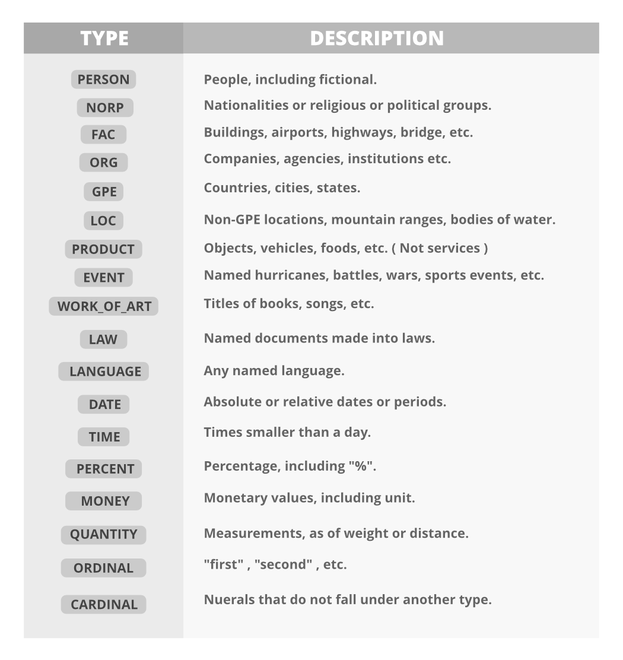

In [109]:
# 5.1
doc = nlp("I'm learning how spaCy works in Python using an Apple mac at 6 p.m.")
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
6 p.m. TIME


In [110]:
# 5.2
from spacy import displacy

doc = nlp("Uohna learning how spaCy works in Python using an Apple mac at 6 p.m.")
displacy.render(doc, style='ent', jupyter=True)

In [111]:
# 6 Part Of Speech Tagging
doc = nlp("I'm learning how spaCy works in Python.")
print([(token.text, token.tag_) for token in doc])

[('I', 'PRP'), ("'m", 'VBP'), ('learning', 'VBG'), ('how', 'WRB'), ('spaCy', 'NN'), ('works', 'VBZ'), ('in', 'IN'), ('Python', 'NNP'), ('.', '.')]


In [112]:
# 6.1
doc = nlp("I'm learning how spaCy works in Python.")
iob_tagged = [
    (
        token.text,
        token.tag_,
        "{0}-{1}".format(token.ent_iob_, token.ent_type_) if token.ent_iob_ != 'O' else token.ent_iob_
    ) for token in doc
]

print(iob_tagged)
print(conlltags2tree(iob_tagged))

[('I', 'PRP', 'O'), ("'m", 'VBP', 'O'), ('learning', 'VBG', 'O'), ('how', 'WRB', 'O'), ('spaCy', 'NN', 'O'), ('works', 'VBZ', 'O'), ('in', 'IN', 'O'), ('Python', 'NNP', 'B-GPE'), ('.', '.', 'O')]
(S
  I/PRP
  'm/VBP
  learning/VBG
  how/WRB
  spaCy/NN
  works/VBZ
  in/IN
  (GPE Python/NNP)
  ./.)


In [113]:
# 7 Chunking

doc = nlp("I'm learning how spaCy works in Python from a course from Whizlabs")
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.label_, chunk.root.text)

I NP I
spaCy NP spaCy
Python NP Python
a course NP course
Whizlabs NP Whizlabs


In [114]:
# 8 Dependency Parsing
doc = nlp("I'm learning how spaCy works in Python from a course from Whizlabs")
for token in doc:
    print("{0}/{1} <--{2}-- {3}/{4}".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

I/PRP <--nsubj-- learning/VBG
'm/VBP <--aux-- learning/VBG
learning/VBG <--ROOT-- learning/VBG
how/WRB <--advmod-- works/VBZ
spaCy/NN <--nsubj-- works/VBZ
works/VBZ <--ccomp-- learning/VBG
in/IN <--prep-- works/VBZ
Python/NNP <--pobj-- in/IN
from/IN <--prep-- works/VBZ
a/DT <--det-- course/NN
course/NN <--pobj-- from/IN
from/IN <--prep-- course/NN
Whizlabs/NNPS <--pobj-- from/IN


In [115]:
# 8.1
doc = nlp("I'm learning how spaCy works in Python from a course from Whizlabs")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [116]:
!python3 -m spacy download en_core_web_lg

2023-06-19 03:04:29.727139: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [117]:
# Download the language model
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [118]:
nlp = spacy.load('en_core_web_lg')
print(nlp.vocab['banana'].vector)

[ 0.20778  -2.4151    0.36605   2.0139   -0.23752  -3.1952   -0.2952
  1.2272   -3.4129   -0.54969   0.32634  -1.0813    0.55626   1.5195
  0.97797  -3.1816   -0.37207  -0.86093   2.1509   -4.0845    0.035405
  3.5702   -0.79413  -1.7025   -1.6371   -3.198    -1.9387    0.91166
  0.85409   1.8039   -1.103    -2.5274    1.6365   -0.82082   1.0278
 -1.705     1.5511   -0.95633  -1.4702   -1.865    -0.19324  -0.49123
  2.2361    2.2119    3.6654    1.7943   -0.20601   1.5483   -1.3964
 -0.50819   2.1288   -2.332     1.3539   -2.1917    1.8923    0.28472
  0.54285   1.2309    0.26027   1.9542    1.1739   -0.40348   3.2028
  0.75381  -2.7179   -1.3587   -1.1965   -2.0923    2.2855   -0.3058
 -0.63174   0.70083   0.16899   1.2325    0.97006  -0.23356  -2.094
 -1.737     3.6075   -1.511    -0.9135    0.53878   0.49268   0.44751
  0.6315    1.4963    4.1725    2.1961   -1.2409    0.4214    2.9678
  1.841     3.0133   -4.4652    0.96521  -0.29787   4.3386   -1.2527
 -1.7734   -3.5637   -0.20035

In [119]:
# 9.1 "man" - "woman" + "queen" = "king"

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector
queen = nlp.vocab['queen'].vector
king = nlp.vocab['king'].vector

In [120]:
nlp.vocab['king'].vector

array([-1.1296e-01, -4.1865e+00, -1.8453e+00,  3.0781e-01,  2.4956e+00,
        9.6267e-01, -1.8161e+00,  4.4655e+00, -2.8210e+00,  9.7090e-01,
        1.3542e+01,  4.3195e-01, -5.3098e+00,  4.7098e+00,  2.9030e+00,
        1.5588e+00,  6.0064e+00, -3.0345e+00,  1.0626e+00, -7.7197e-01,
       -5.4771e+00, -9.7380e-01, -4.4345e+00,  5.8367e+00,  2.4302e+00,
       -3.9408e+00, -9.1862e-01, -4.9124e+00,  1.4591e+00, -7.2772e-01,
        3.4957e+00, -4.0077e+00, -1.8354e+00, -4.1052e+00,  4.9211e+00,
       -9.7053e-01,  1.9223e+00,  5.2605e+00,  1.6086e+00,  7.1328e-01,
       -1.2146e+00, -1.9869e+00,  8.0265e-01,  2.9298e+00,  7.2985e-01,
       -6.2892e-01, -1.7082e+00,  1.9893e+00,  4.7529e-01,  3.2264e+00,
       -3.9215e+00,  4.6556e+00,  1.3475e+00, -1.0979e+00, -3.0365e+00,
        1.5815e+00,  2.2835e+00, -4.0616e+00,  2.5730e+00,  4.0618e+00,
        9.5438e-01, -6.2563e+00,  5.6463e+00, -3.8933e+00,  4.4076e+00,
        2.0517e+00, -6.6906e+00, -6.9448e+00,  6.0371e+00,  9.30

In [121]:
# We now need to find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
maybe_king = man - woman + queen
computed_similarities = []

for word in nlp.vocab:
    # Ignore words without vectors
    if not word.has_vector:
        continue
    similarity = cosine_similarity(maybe_king, word.vector)
    computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
print([w[0].text for w in computed_similarities[:10]])


['queen', 'man', 'king', 'woman', 'he', 'nothin’', "'cause", "'Cause", 'He', 'That']


In [122]:
# 10 Compute Similarity

banana = nlp.vocab['banana']
dog = nlp.vocab['dog']
fruit = nlp.vocab['fruit']
animal = nlp.vocab['animal']

print(dog.similarity(animal), dog.similarity(fruit))
print(banana.similarity(fruit), banana.similarity(animal))

0.5192115902900696 0.13643456995487213
0.6650428175926208 0.18752224743366241


In [123]:
# 10.1 Sentences

target = nlp("Cats are beautiful animals.")

doc1 = nlp("Dogs are awesome.")
doc2 = nlp("Some gorgeous creatures are felines.")
doc3 = nlp("Dolphins are swimming mammals.")

print(target.similarity(doc1))
print(target.similarity(doc2))
print(target.similarity(doc3))

0.925293344292394
0.9067517259890845
0.9037427153904276


In [124]:

def penn_to_wn(tag):
    if tag.startswith('N'):
        return 'n'
    if tag.startswith('V'):
        return 'v'
    if tag.startswith('J'):
        return 'a'
    if tag.startswith('R'):
        return 'r'
    return None




In [125]:
from nltk.corpus import wordnet as wn

In [126]:
# Define the WordnetPipeline component
class WordnetPipeline:
    def __init__(self, nlp):
        Token.set_extension('synset', default=None, force=True)
        self.nlp = nlp

    def __call__(self, doc):
        for token in doc:
            if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']:
                synsets = wn.synsets(token.lemma_, penn_to_wn(token.pos_))
                if synsets:
                    token._.synset = synsets[0]
        return doc

In [127]:
# Load the 'en_core_web_sm' model
nlp = spacy.load("en_core_web_sm")

In [128]:
# 11.1 Pipeline structure

print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [129]:

from nltk.corpus import wordnet as wn

def penn_to_wn(tag):
    if tag.startswith('N'):
        return 'n'
    if tag.startswith('V'):
        return 'v'
    if tag.startswith('J'):
        return 'a'
    if tag.startswith('R'):
        return 'r'
    return None

# Define the WordnetPipeline component
class WordnetPipeline:
    def __init__(self, nlp):
        Token.set_extension('synset', default=None, force=True)
        self.nlp = nlp

    def __call__(self, doc):
        for token in doc:
            if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']:
                synsets = wn.synsets(token.lemma_, penn_to_wn(token.pos_))
                if synsets:
                    token._.synset = synsets[0]
        return doc


In [131]:
nlp = spacy.load('en_core_web_sm')
wn_pipeline = WordnetPipeline(nlp)
#nlp.add_pipe(wn_pipeline, name="wn_synsets", last=True)

doc = nlp("apple world this")

for token in doc:
    print(token.text, "-", token._.synset)

apple - None
world - None
this - None
